# PEMBAGIAN TUGAS
- Agnes = data preprocessing
- Teguh = Label encoding
- Aslam = EDA (check outlier, data visualization)
- Priyo = EDA (Heatmap, correlation, distribution numeric)
- Bintang = Data splitting + Scaling
- Alfi = Regression + model optimization
- Aditya = Model deployment


# Import libraries & dataset

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.preprocessing import StandardScaler


from matplotlib.gridspec import GridSpec
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor # CatBoost Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score # model evaluation
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


training_score = []
testing_score = []
rmse=[]
models = []

In [ ]:
df = pd.read_csv('/content/diamonds.csv')

In [ ]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Data Pre-Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Replace zero dimensions (x,y,z)  

In [ ]:
# Cek data dimensi x, y, z yang bernilai 0
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
# Ganti dimensi yang 0 dengan median
df['x'] = df['x'].replace(0, df['x'][df['x'] != 0].median())
df['y'] = df['y'].replace(0, df['y'][df['y'] != 0].median())
df['z'] = df['z'].replace(0, df['z'][df['z'] != 0].median())

In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.732003,5.735267,3.540043
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Check non-numeric columns

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Tidak ada typo values

## Check Missing Value

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


No missing values

## Check Duplicates

In [ ]:
df.duplicated().sum()

0

No duplicates

## Remove unnecessary column

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Label Encoding

Label encoder yang digunakan adalah one-hot encoder pada kolom/ feature: cut, color, dan quality, karena memiliki lebih dari 2 kategori

In [ ]:
# Save data aslinya
df_tmp = df.copy()

In [ ]:
df_tmp = pd.get_dummies(df_tmp) # One-Hot Encoding

In [ ]:
df_tmp

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  bool   
 8   cut_Good       53940 non-null  bool   
 9   cut_Ideal      53940 non-null  bool   
 10  cut_Premium    53940 non-null  bool   
 11  cut_Very Good  53940 non-null  bool   
 12  color_D        53940 non-null  bool   
 13  color_E        53940 non-null  bool   
 14  color_F        53940 non-null  bool   
 15  color_G        53940 non-null  bool   
 16  color_H        53940 non-null  bool   
 17  color_I        53940 non-null  bool   
 18  color_

Dataset sudah ter-encoding dan sudah bersih.

# EDA

## Check outlier

Outliers
- Price: Memiliki outliers yang signifikan, terutama di sisi kanan (harga berlian sangat mahal). Fitur ini menunjukkan distribusi yang berat sebelah (right-skewed).
- Carat: Banyak outliers di sisi kanan, menunjukkan beberapa berlian dengan berat yang jauh lebih besar dari rata-rata.
- Depth dan Table: Jumlah outliers juga cukup banyak, baik di sisi bawah maupun atas, dengan distribusi utama berada di tengah.
- X, Y, Z: Jumlah outliers-nya relatif lebih sedikit dibandingkan fitur lain, tetapi nilai ekstrem pada y dan z terlihat tidak realistis, seperti dimensi fisik berlian yang mencapai lebih dari 30 atau 60 mm.

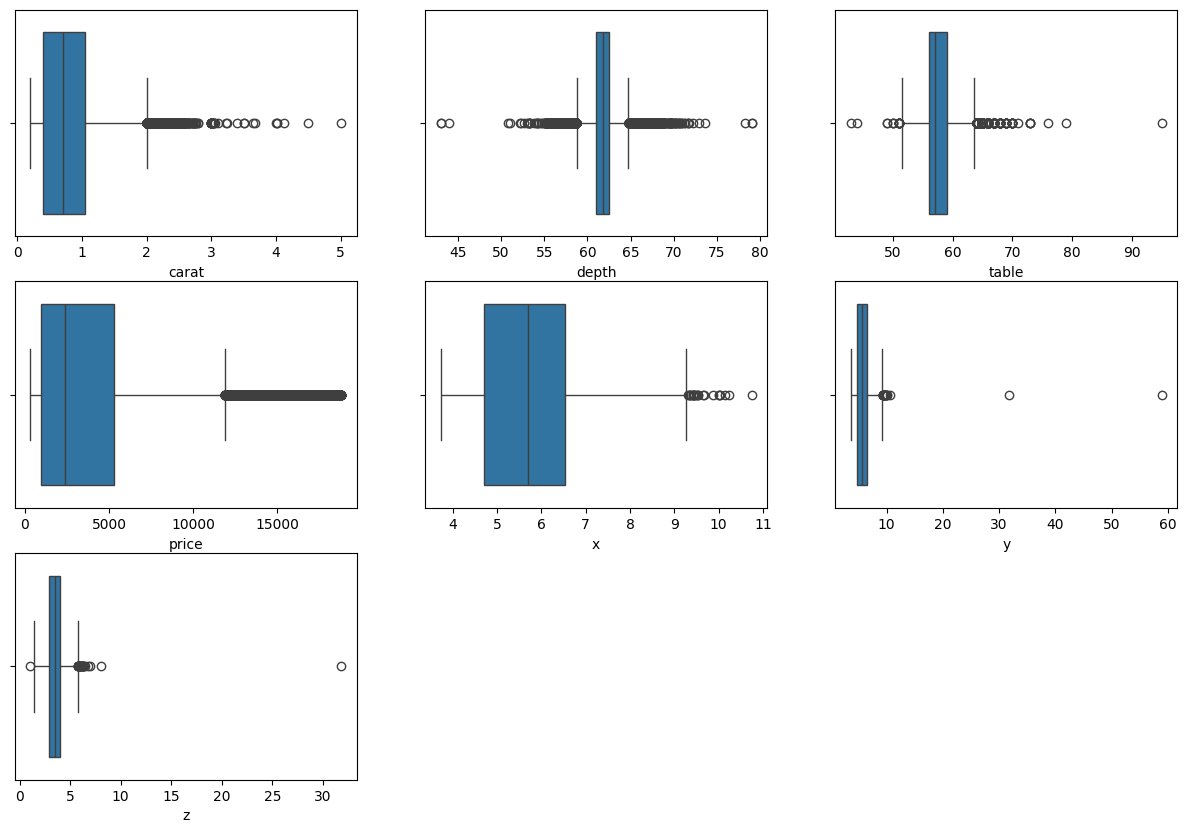

In [ ]:
fitur_numerik = ['carat', 'depth', 'table','price','x','y','z']

plt.figure(figsize=(15,10))
for i, feature in enumerate(fitur_numerik, 1):
  plt.subplot(3,3,i)
  sns.boxplot(data=df_tmp, x=feature)

- Sebagian besar fitur memiliki distribusi data yang terkonsentrasi di rentang tertentu dengan keberadaan outliers.
- Fitur seperti carat, depth, table, price, x, y, dan z menunjukkan pola yang beragam, dengan jumlah dan tingkat ekstremitas outliers yang bervariasi.

## Data visualization (pair chart, histogram, )

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

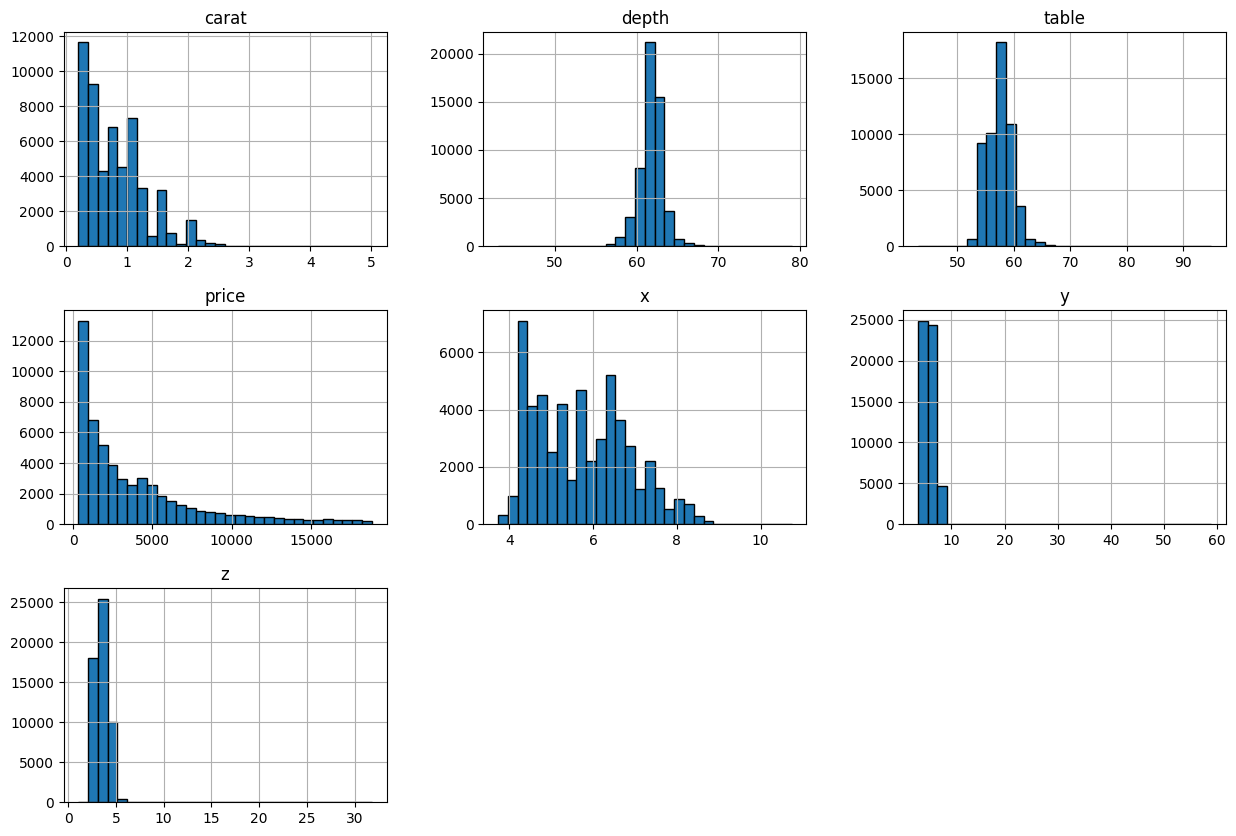

In [ ]:
df_tmp.hist(bins=30, figsize=(15,10), edgecolor='black')

## Heatmap & Correlation

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.977636  0.953868  0.960424
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025094 -0.029139  0.094987
table  0.181618 -0.295779  1.000000  0.127134  0.196076  0.184469  0.152424
price  0.921591 -0.010647  0.127134  1.000000  0.886999  0.867649  0.867569
x      0.977636 -0.025094  0.196076  0.886999  1.000000  0.974927  0.975106
y      0.953868 -0.029139  0.184469  0.867649  0.974927  1.000000  0.956445
z      0.960424  0.094987  0.152424  0.867569  0.975106  0.956445  1.000000


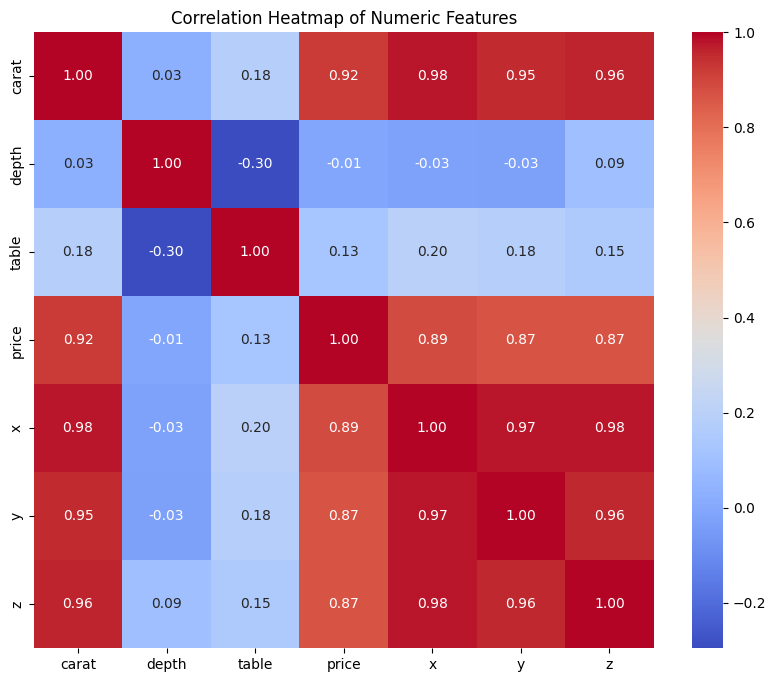

In [ ]:
#Korelasi dan Heatmap
correlation_matrix = df_tmp[['carat', 'depth', 'table','price','x','y','z']].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


- Kolom Price memiliki korelasi yang sangat kuat dengan carat, x, y, dan z
 Hal ini menunjukkan bahwa semakin besar nilai carat (berat berlian) dan dimensi (x, y, z), maka harga berlian akan semakin tinggi.

- Dimensi x, y, dan z memiliki korelasi yang sangat kuat satu sama lain.
Hal ini menunjukkan bahwa ketiga dimensi ini menggambarkan ukuran fisik berlian. Jika salah satu dimensi meningkat, kemungkinan besar dimensi lainnya juga akan meningkat.

- Depth memiliki korelasi negatif lemah dengan price.
Hal ini menunjukkan bahwa ada sedikit kecenderungan di mana berlian dengan depth yang lebih rendah cenderung memiliki harga yang sedikit lebih tinggi. Namun, korelasi ini sangat lemah dan mungkin tidak signifikan secara statistik.

- Table memiliki korelasi positif lemah dengan price.
Hal ini menunjukkan bahwa ada sedikit kecenderungan di mana berlian dengan table yang lebih lebar cenderung memiliki harga yang sedikit lebih tinggi. Sama seperti depth, korelasi ini juga bersifat lemah.

## Distribution of numerical variable

<ipython-input-24-837eaf3caaed>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp[col], fit=norm)


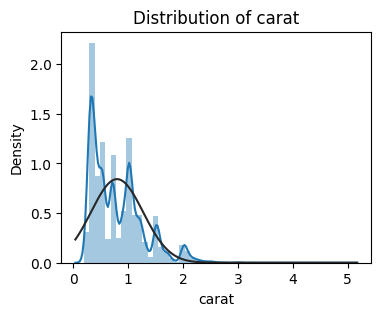

<ipython-input-24-837eaf3caaed>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp[col], fit=norm)


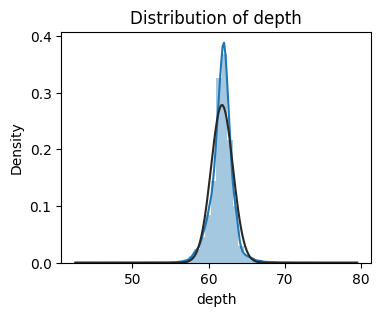

<ipython-input-24-837eaf3caaed>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp[col], fit=norm)


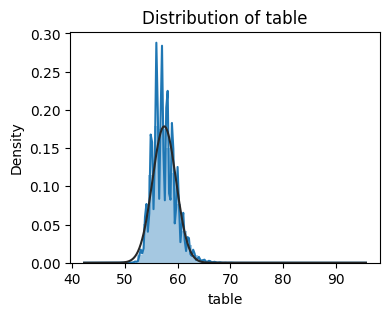

<ipython-input-24-837eaf3caaed>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp[col], fit=norm)


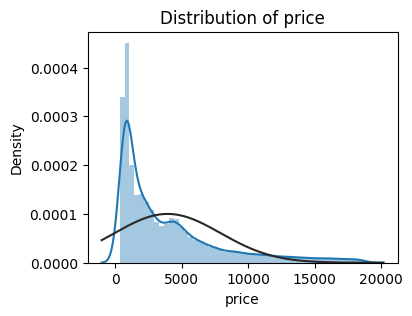

<ipython-input-24-837eaf3caaed>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp[col], fit=norm)


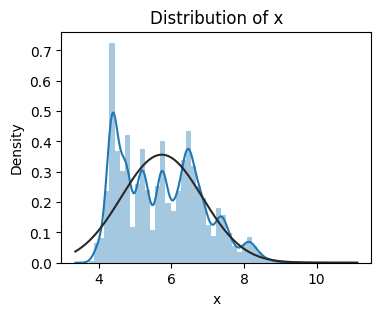

<ipython-input-24-837eaf3caaed>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp[col], fit=norm)


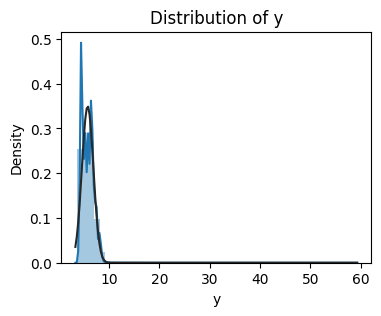

<ipython-input-24-837eaf3caaed>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tmp[col], fit=norm)


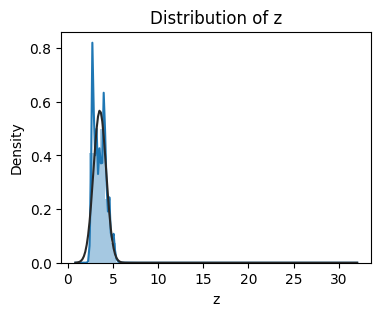

In [ ]:
from scipy.stats import norm

#Distribusi data
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(4, 3))
    sns.distplot(df_tmp[col], fit=norm)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
#Skewness dan Kurtosis data
print(f"Skewness: {df_tmp[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].skew()}")
print(f"Kurtosis: {df_tmp[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].kurt()}")

Skewness: carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.398517
y        2.460720
z        1.585799
dtype: float64
Kurtosis: carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.702667
y        91.744699
z        47.783425
dtype: float64


**Skewness**

Sebagian besar variabel (carat, price, x, y, z) memiliki skewness positif. Ini mengindikasikan bahwa distribusi data cenderung condong ke kanan. Artinya, terdapat beberapa nilai ekstrem yang sangat tinggi (outlier) pada variabel-variabel tersebut. Dalam konteks data berlian, ini mungkin disebabkan oleh adanya beberapa berlian dengan ukuran dan harga yang jauh di atas rata-rata.
Hanya variabel 'depth' yang memiliki skewness negatif. Ini berarti distribusi 'depth' condong ke kiri, dengan beberapa nilai ekstrem yang sangat rendah. Kemungkinan, ada beberapa berlian dengan kedalaman yang jauh di bawah rata-rata.

**Kurtosis**

Beberapa variabel (depth, table, price, y, z) memiliki nilai kurtosis yang sangat tinggi. Ini menunjukkan bahwa distribusi data memiliki ekor yang sangat tebal dan puncak yang sangat tajam. Artinya, terdapat banyak outlier atau nilai ekstrem pada kedua ujung distribusi.
Sedangkan variabel 'x' memiliki kurtosis negatif, yang berarti distribusi datanya lebih datar dibandingkan distribusi normal.

<Figure size 640x480 with 0 Axes>

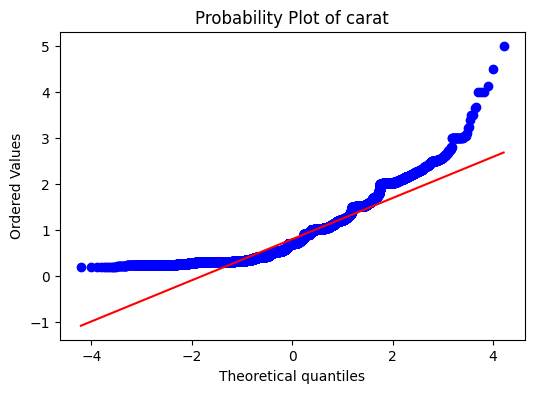

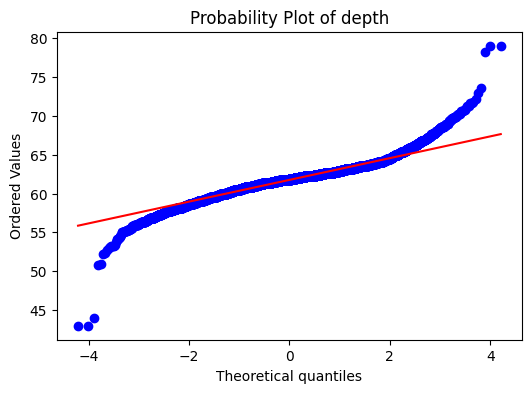

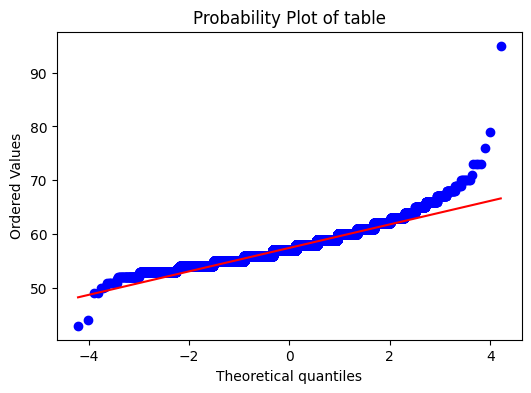

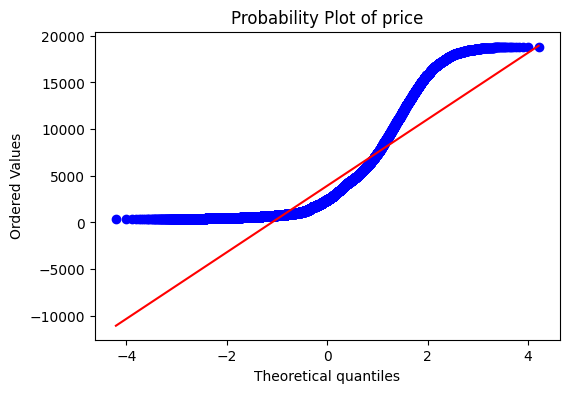

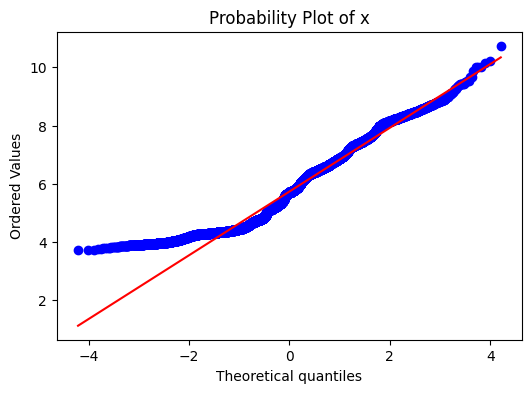

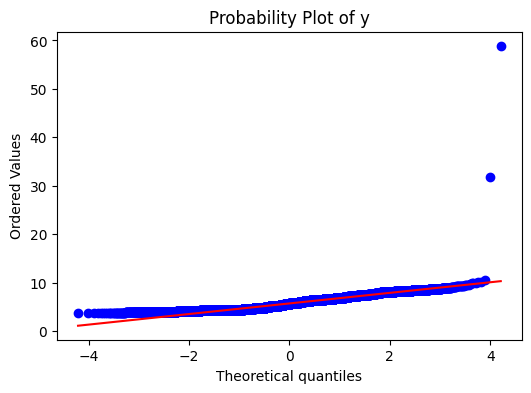

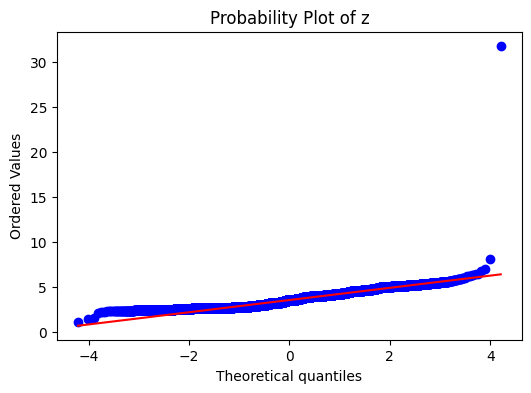

In [ ]:
#Prob Plot
from scipy import stats
fig = plt.figure()
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(6, 4))
    stats.probplot(df_tmp[col], dist="norm", plot=plt)
    plt.title(f'Probability Plot of {col}')
    plt.show()

Plot probabilitas ini menegaskan kesimpulan yang di dapatkan dari nilai skewness dan kurtosis sebelumnya. Yaitu, distribusi harga berlian tidak mengikuti distribusi normal. Sebaliknya, distribusi ini cenderung condong ke kanan dengan adanya beberapa nilai yang lebih tinggi dan jauh dari distribusi normalnya.

In [ ]:
#Meng-copy data untuk di transformasi
df_norm = df_tmp.copy()
df_split_test = df_tmp.copy() #untuk data x_train dan X_test

In [ ]:
from sklearn.preprocessing import QuantileTransformer

#Transformasi menggunakan quantile transformer
qt = QuantileTransformer(output_distribution='normal')

# Kolom yang akan ditransformasi
columns_to_transform = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Melakukan transformasi
df_norm[columns_to_transform] = qt.fit_transform(df_norm[columns_to_transform])

<ipython-input-29-0e1e2e7c467e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm[col], fit=norm)


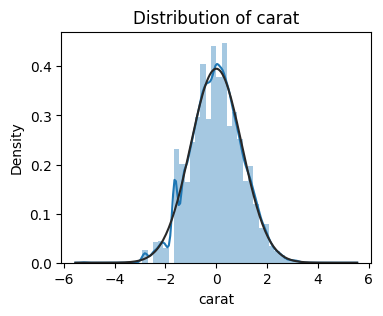

<ipython-input-29-0e1e2e7c467e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm[col], fit=norm)


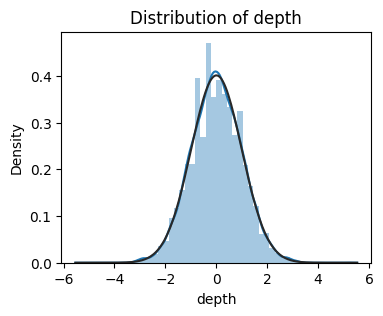

<ipython-input-29-0e1e2e7c467e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm[col], fit=norm)


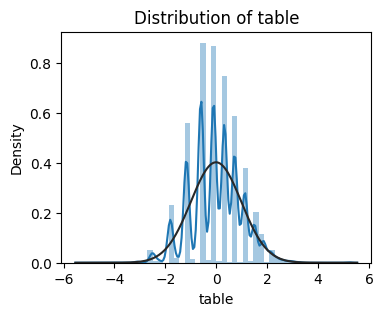

<ipython-input-29-0e1e2e7c467e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm[col], fit=norm)


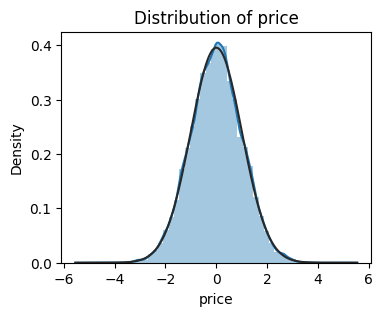

<ipython-input-29-0e1e2e7c467e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm[col], fit=norm)


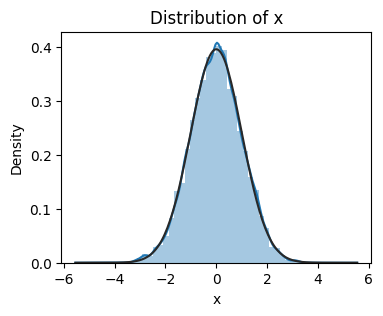

<ipython-input-29-0e1e2e7c467e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm[col], fit=norm)


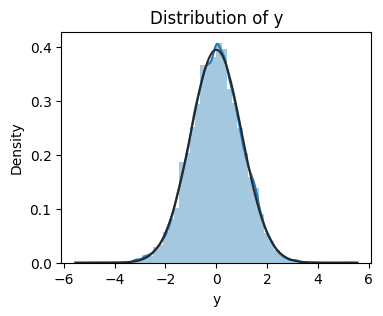

<ipython-input-29-0e1e2e7c467e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm[col], fit=norm)


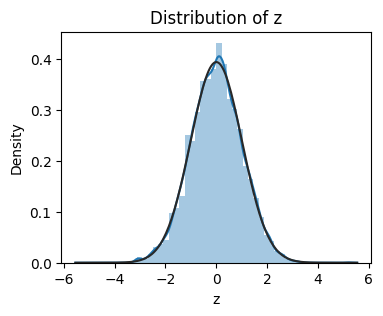

In [ ]:
#Distribusi data yang sudah di transformasi
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(4, 3))
    sns.distplot(df_norm[col], fit=norm)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
#Skewness dan Kurtosis data yang sudah di transformasi
print(f"Skewness: {df_norm[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].skew()}")
print(f"Kurtosis: {df_norm[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].kurt()}")

Skewness: carat   -0.022026
depth    0.002655
table    0.079153
price    0.013557
x       -0.031713
y       -0.021750
z        0.000647
dtype: float64
Kurtosis: carat    0.109080
depth    0.090423
table    0.298710
price    0.034465
x        0.043893
y        0.062643
z        0.090997
dtype: float64


Berdasarkan nilai skewness dan kurtosisn dari data yang telah di normalisasi, nilai skewness sudah mendekati nol. Ini menunjukkan bahwa distribusi data untuk semua variabel cenderung simetris. Artinya, tidak ada kecenderungan yang signifikan bagi data untuk berkumpul di salah satu ujung distribusi.
Nilai kurtosis juga relatif rendah untuk semua variabel. Ini mengindikasikan bahwa distribusi data cenderung mirip dengan distribusi normal, dengan puncak yang tidak terlalu tajam dan ekor yang tidak terlalu tebal.

Karena nilai skewness dan kurtosis mendekati nilai untuk distribusi normal, maka kita dapat berasumsi bahwa data Anda terdistribusi secara normal.

<Figure size 640x480 with 0 Axes>

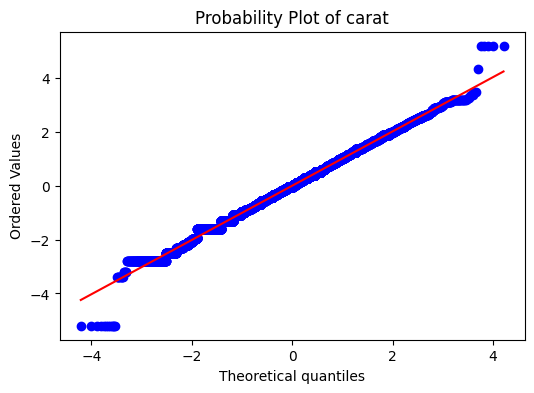

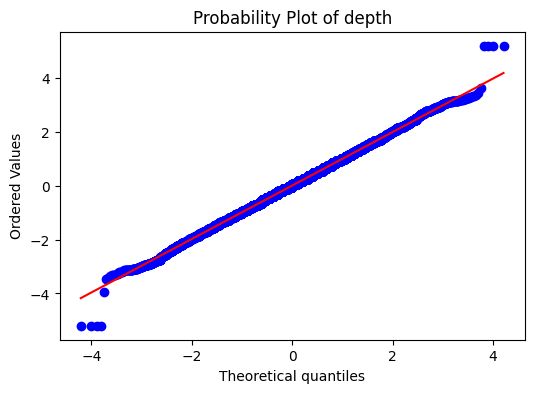

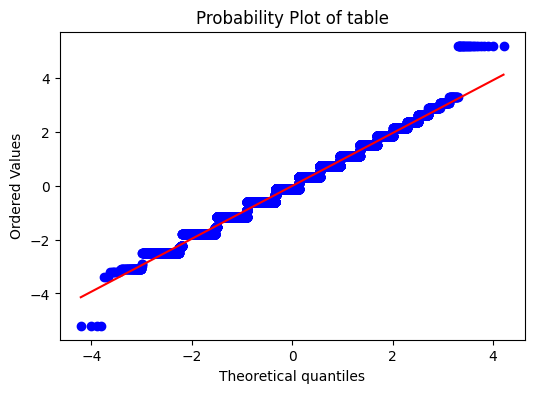

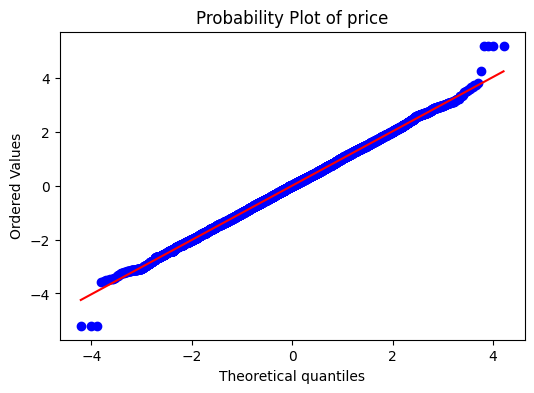

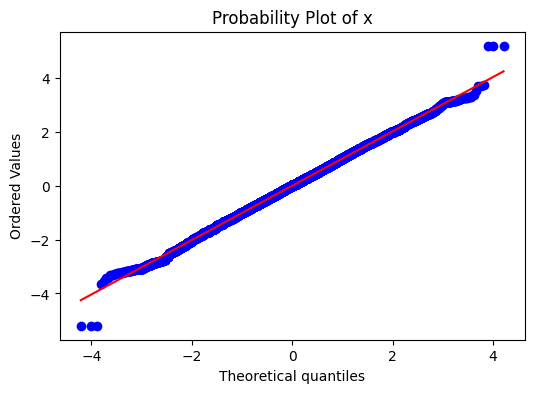

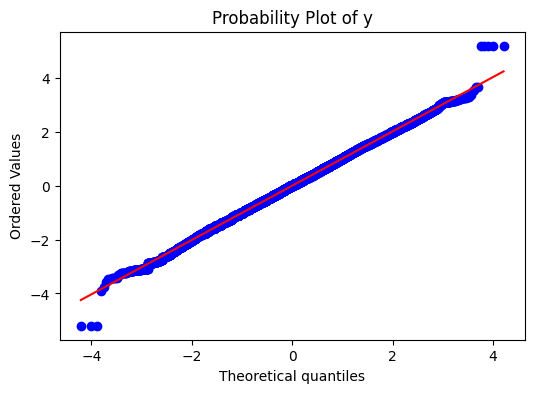

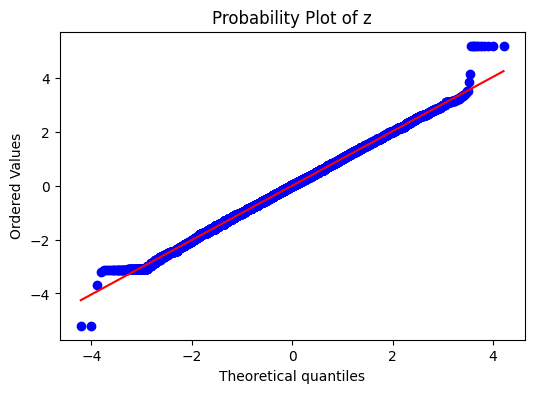

In [ ]:
#Prob Plot data yang sudah di transformasi
fig = plt.figure()
for col in ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    plt.figure(figsize=(6, 4))
    stats.probplot(df_norm[col], dist="norm", plot=plt)
    plt.title(f'Probability Plot of {col}')
    plt.show()

In [ ]:
df_norm.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-2.806711,-0.300542,-1.171890,-5.199338,-2.785855,-2.747453,-2.747453,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,-3.402659,-1.352623,1.497997,-5.199338,-3.109054,-3.255591,-3.118134,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,-2.806711,-2.807003,2.611712,-5.199338,-2.329085,-2.325972,-3.118134,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,-1.926403,0.564267,0.317650,-3.574909,-1.994971,-1.951050,-1.811457,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,-1.301191,1.286702,0.317650,-3.539820,-1.346386,-1.349498,-0.965420,False,True,False,...,False,True,False,False,False,True,False,False,False,False


# Model Building

## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df_split_test.drop(columns=['price'])  #'price' adalah target
y = df_split_test['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)
print("Ukuran target latih (y_train):", y_train.shape)
print("Ukuran target uji (y_test):", y_test.shape)


Ukuran data latih (X_train): (43152, 26)
Ukuran data uji (X_test): (10788, 26)
Ukuran target latih (y_train): (43152,)
Ukuran target uji (y_test): (10788,)


In [ ]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [ ]:
df_tmp

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

# scaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_train_scaled.head()


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
26546,2.046875,-2.466667,2.333333,1.390110,1.370166,1.097345,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9159,0.484375,-1.200000,1.000000,0.478022,0.430939,0.345133,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14131,0.625000,0.466667,0.333333,0.489011,0.458564,0.504425,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15757,1.250000,-0.200000,2.666667,0.829670,0.806630,0.787611,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24632,1.281250,0.200000,0.000000,0.862637,0.889503,0.884956,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Regression

## Model Optimization

### Linear

R^2 Score Traning:  92.03399321321474
R^2 Score Test : 91.92492310987521
Mean Squared Error: 1283680.5552750651


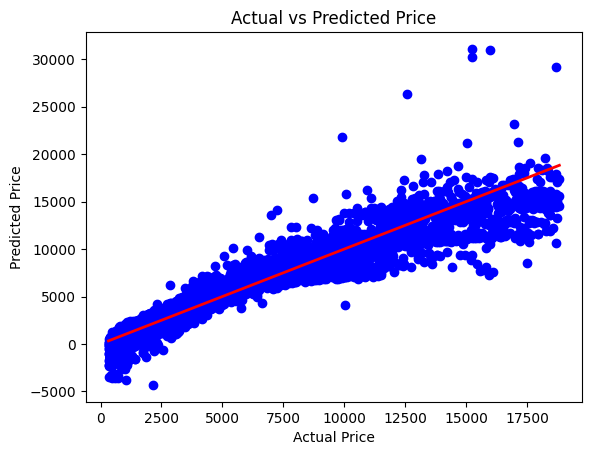

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
a = r2_score(y_train,y_train_pred)*100
b = r2_score(y_test,y_pred)*100
c = mean_squared_error(y_test, y_pred)
training_score.append(a)
testing_score.append(b)
rmse.append(c)
models.append('Linear Regression')

print("R^2 Score Traning: ", a)
print("R^2 Score Test :", b)
print("Mean Squared Error:", c)


# Plotting Actual vs Predicted prices
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", lw=2)  # Diagonal line
plt.show()

### CatBoost

R^2 Score Traning:  98.88885101271283
R^2 Score Test : 98.19905017106836
Mean Squared Error: 286293.7787320276


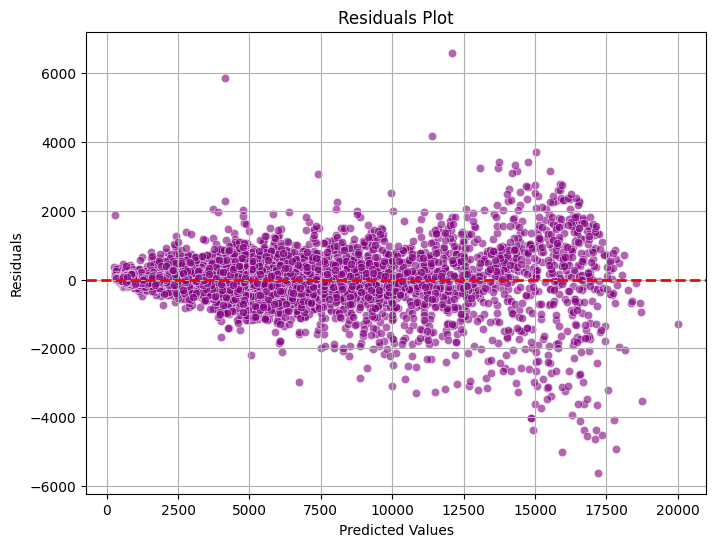

In [ ]:
# Initialize and train the CatBoost model
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
a = r2_score(y_train,y_train_pred)*100
b = r2_score(y_test,y_pred)*100
c = mean_squared_error(y_test, y_pred)
training_score.append(a)
testing_score.append(b)
rmse.append(c)
models.append('CatBoost Regression')

print("R^2 Score Traning: ", a)
print("R^2 Score Test :", b)
print("Mean Squared Error:", c)

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color="purple", alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()



### Decission Tree

R^2 Score Traning:  91.40957372144415
R^2 Score Test : 91.22808286330093
Mean Squared Error: 1394456.005073497


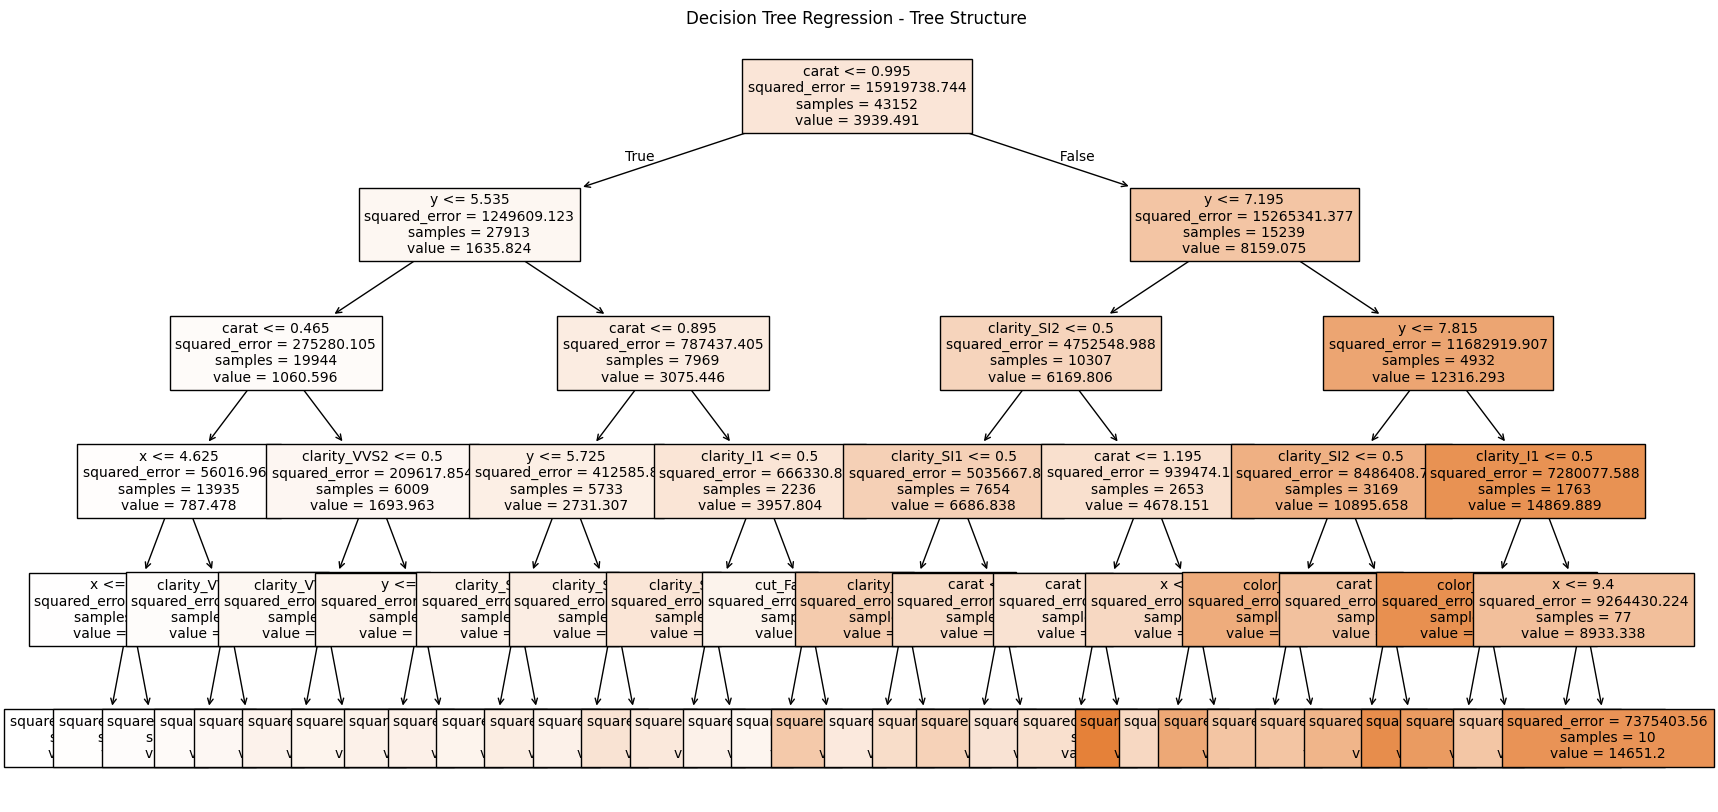

In [ ]:
# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluate the model
a = r2_score(y_train,y_train_pred)*100
b = r2_score(y_test,y_pred)*100
c = mean_squared_error(y_test, y_pred)
training_score.append(a)
testing_score.append(b)
rmse.append(c)

models.append('Decession Tree')

print("R^2 Score Traning: ", a)
print("R^2 Score Test :", b)
print("Mean Squared Error:", c)

# Visualisasi
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree Regression - Tree Structure")
plt.show()


### Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.492e+07, tolerance: 6.870e+07
  model = cd_fast.enet_coordinate_descent(


R^2 Score Traning:  92.03395762681393
R^2 Score Test : 91.92557219521711
Mean Squared Error: 1283577.3713371984


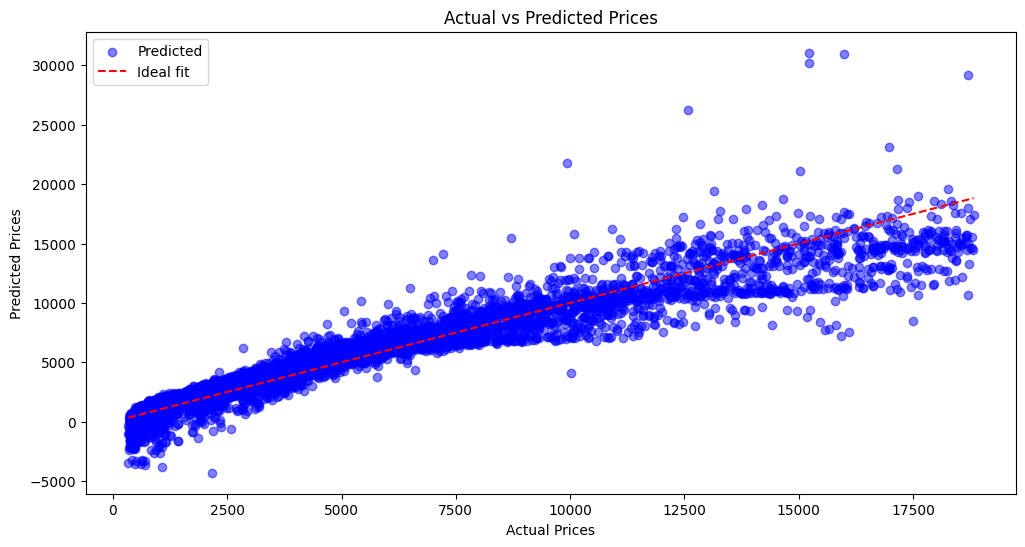

In [ ]:
#Inisialisasi dan latih model Lasso
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

# Prediksi
y_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


# Evaluate the model
a = r2_score(y_train,y_train_pred)*100
b = r2_score(y_test,y_pred)*100
c = mean_squared_error(y_test, y_pred)
training_score.append(a)
testing_score.append(b)
rmse.append(c)

models.append('Lasso Regression')

print("R^2 Score Traning: ", a)
print("R^2 Score Test :", b)
print("Mean Squared Error:", c)


# Scatter plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal fit')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()

### Model Evaluation

In [ ]:
compare_models = pd.DataFrame({"Algorithms":models,
                               "Training Score":training_score,
                               "Testing Score":testing_score,
                               "RMSE":rmse})
compare_models

,Algorithms,Training Score,Testing Score,RMSE
0,Linear Regression,92.033993,91.924923,1.283681e+06
1,CatBoost Regression,98.888851,98.199050,2.862938e+05
2,Decession Tree,91.409574,91.228083,1.394456e+06
3,Lasso Regression,92.033958,91.925572,1.283577e+06


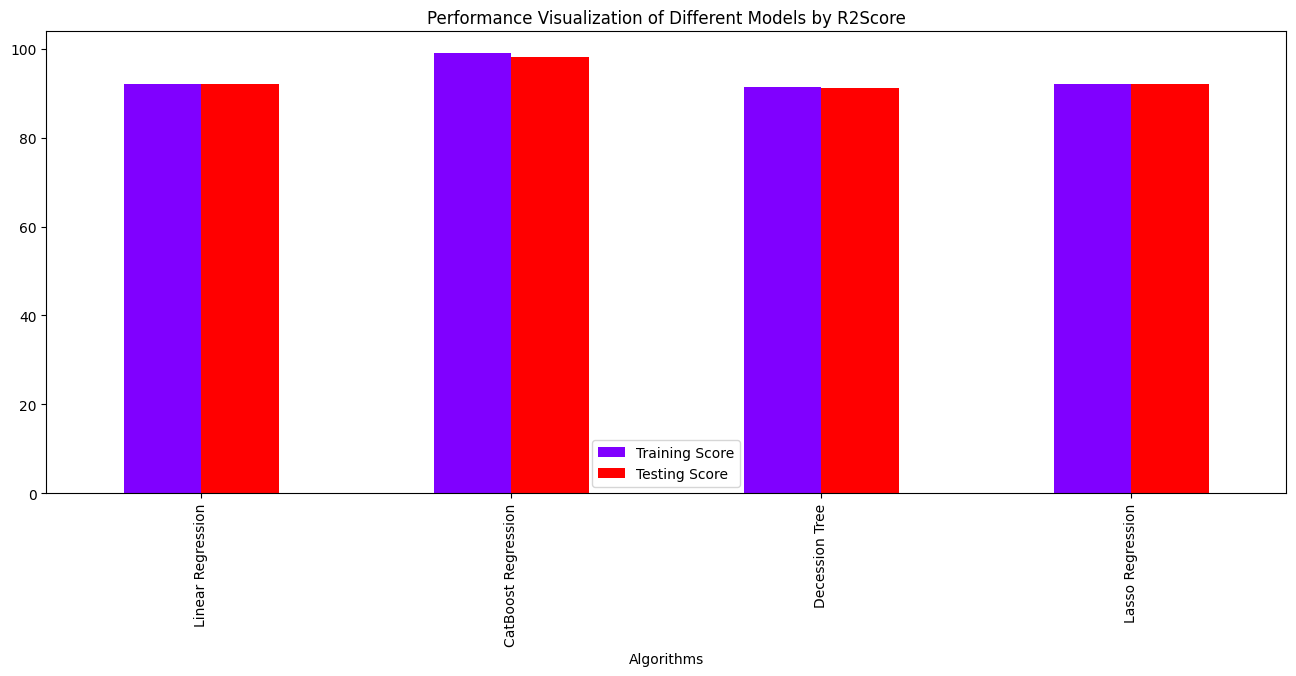

In [ ]:
compare_models.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",title="Performance Visualization of Different Models by R2Score",colormap="rainbow")
plt.show()

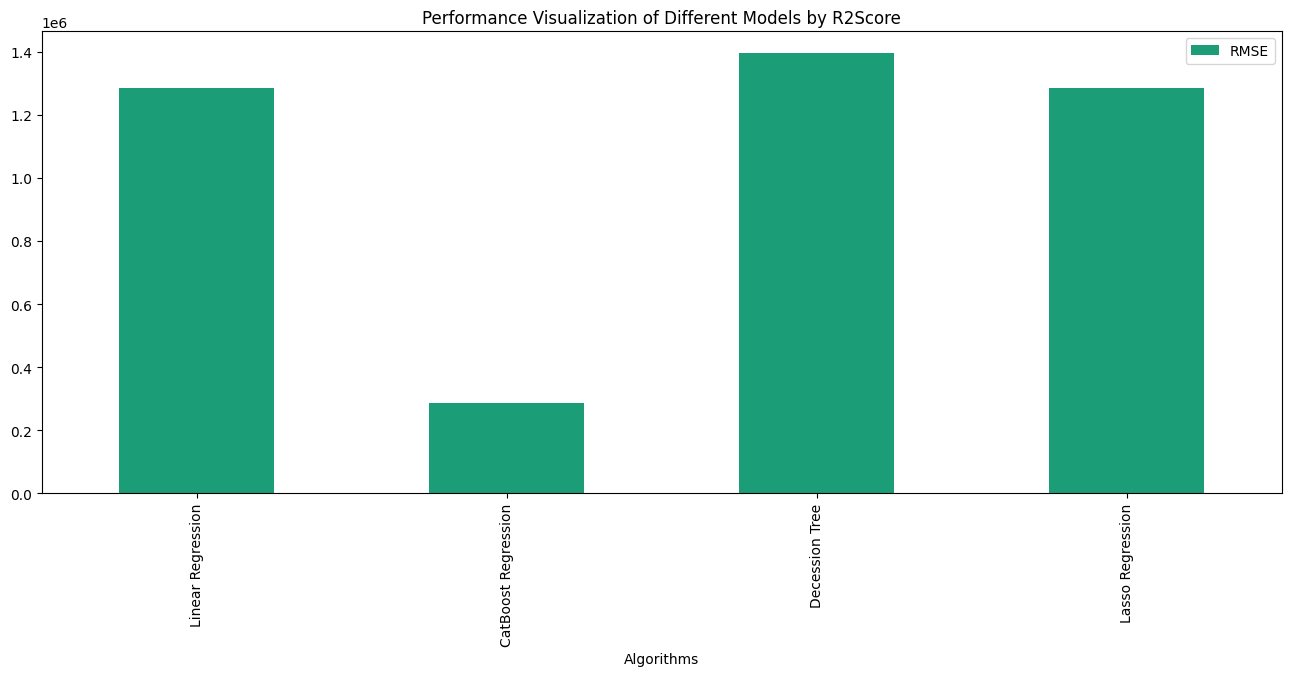

In [ ]:
compare_models.plot(x="Algorithms",y=["RMSE"], figsize=(16,6),kind="bar",title="Performance Visualization of Different Models by R2Score",colormap="Dark2")
plt.show()

**Kesimpulan**
*   CatBoost Regression memberikan hasil terbaik dengan akurasi tinggi (98.05% pada data uji) dan tingkat kesalahan terendah (RMSE 0.0196).
*   Linear Regression cukup baik dengan akurasi 93.39% dan RMSE 0.0665.
*   Decision Tree akurasinya 90.68%, tetapi tingkat kesalahannya lebih tinggi (RMSE 0.0937).
*   Lasso Regression memiliki performa terendah dengan akurasi 86.07% dan RMSE 0.1401.

**Rekomendasi Pemilihan Model**

Untuk implementasi, CatBoost Regression direkomendasikan sebagai model utama karena memiliki performa prediksi terbaik. Namun, jika diperlukan model yang lebih sederhana dan interpretatif, Linear Regression dapat menjadi alternatif dengan pengorbanan akurasi. Optimalisasi lebih lanjut dapat dilakukan pada Decision Tree untuk meningkatkan performanya.

# Model Deployment

In [ ]:
import pickle

In [ ]:
with open('CatBoostRegressor.pkl', 'wb') as file:
    pickle.dump(model, file)